In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import csv

In [13]:
#read in data
threeK_fractal_data = pd.DataFrame(pd.read_csv("data/3000_particles.csv", dtype=np.float64))

oneK_fractal_data = pd.DataFrame(pd.read_csv("data/1000endNum.csv", dtype=np.float64))

def fractal_sorter(fractal_data):
    #convert each set of data to numpy array
    rawNumParticles = fractal_data.numParticles.to_numpy()
    rawClusterRadius = fractal_data.clusterRadius.to_numpy()


    #array of indexes of where a new fractal starts
    sliceNum = 10
    where_isTen = np.where(rawNumParticles == sliceNum)

    #initialise empty array to store each fractal
    previousIndex = 0
    slicedNumParticles = []
    slicedClusterRadius = []

    #slices fractal data up
    for i in where_isTen[0]:

        temp_numParticles = rawNumParticles[previousIndex: i]
        temp_ClusterRadius = rawClusterRadius[previousIndex: i]
        
        slicedNumParticles.append(temp_numParticles)
        slicedClusterRadius.append(temp_ClusterRadius)

        previousIndex = i
        
    #appends final fractal data
    slicedNumParticles.append(rawNumParticles[previousIndex:])
    slicedClusterRadius.append(rawClusterRadius[previousIndex:])

    #gets rid of 0th row that was empty
    slicedNumParticles = slicedNumParticles[1:]
    slicedClusterRadius = slicedClusterRadius[1:]
    
    return slicedNumParticles, slicedClusterRadius


In [14]:
#find average cluster radius at each particle number

def getAverage(particleList, radiusList):
    numFractals = len(particleList)
    numValues = len(radiusList[0])
    meanSizes = np.zeros(numValues)
    meanSquareSizes = np.zeros(numValues)
    SizeErrors = np.zeros(numValues)
    ln_errors = []
    
    #calculates average clusterRadius
    for i in range(numFractals):
        for j in range(numValues):
            meanSizes[j] += radiusList[i][j]/numFractals
            meanSquareSizes[j] += (radiusList[i][j]**2)/numFractals

    for k in range(numValues):
        SizeErrors[k] += (1/np.sqrt(numFractals-1)) * np.sqrt(meanSquareSizes[k] - meanSizes[k]**2)
        #print(SizeErrors[k])
        
    for l in range(numValues):
        ln_errors.append(SizeErrors[l] / meanSizes[l])
            
    return meanSizes, ln_errors


In [15]:
#process 3000 particle fractals

threeK_numParticles = fractal_sorter(threeK_fractal_data)[0]
threeK_clusterRadius = fractal_sorter(threeK_fractal_data)[1]
threeK_meanClusterSize = getAverage(threeK_numParticles, threeK_clusterRadius)[0]

threeK_log_clusterSize = np.log(threeK_meanClusterSize)
threeK_log_numParticles = np.log(threeK_numParticles)[0]
threeK_errors = getAverage(threeK_numParticles, threeK_clusterRadius)[1]

#process 2000 particle fractals

#process 1000 particle fractals
oneK_numParticles = fractal_sorter(oneK_fractal_data)[0]
oneK_clusterRadius = fractal_sorter(oneK_fractal_data)[1]
oneK_meanClusterSize = getAverage(oneK_numParticles, oneK_clusterRadius)[0]

oneK_log_clusterSize = np.log(oneK_meanClusterSize)
oneK_log_numParticles = np.log(oneK_numParticles)[0]
oneK_errors = getAverage(oneK_numParticles, oneK_clusterRadius)[1]

In [68]:
#function to calculate fractal dimension fd

def best_fit(x, slope , intercept):
    return slope*x + intercept

def getFracalDim(ln_numParticles, ln_clusterSize):
    
    popt, pcov = curve_fit(best_fit, ln_clusterSize, ln_numParticles)
    fd = popt[0]   
    fd_err = np.sqrt(np.diag(pcov))[0]
    
    return fd, fd_err
    
    
def getFractalDim_nth(numParticles, clusterSize, N):
    tempSizes, tempNums = [], []
    
    for i in range (len(numParticles)):
        cutOffIndex = np.where(numParticles[i] == N)[0][0]
        tempSizes.append(clusterSize[0:cutOffIndex+1])
        tempNums.append(numParticles[0][0:cutOffIndex+1])
     
    tempSizes = tempSizes[0]
    tempNums = tempNums[0]
    
    #now calculate fractal dim
    fd = getFracalDim(np.log(tempNums), np.log(tempSizes))[0]
    fd_err = getFracalDim(np.log(tempNums), np.log(tempSizes))[1]
    
    return fd, fd_err
    
        
    

'''''
def getFracalDim_nth(ln_numParticles, ln_clusterSize, N):
    """Function calculates fractal dimension up to numParticles == N
    """
    temp_numParticles, temp_clusterSize = [], []
    
    ln_N = np.log(N)
    
    for i in range(len(ln_numParticles)):
        cutOffIndex = np.where(ln_numParticles[i] == ln_N)
        print(f"cutoff index = {cutOffIndex}")
        temp_numParticles.append(ln_numParticles[0:cutOffIndex+1][i])
        temp_clusterSize.append(ln_clusterSize[0:cutOffIndex+1][i])       
    
    #cutOffIndex = np.where(ln_numParticles == ln_N)
    
   # temp_numParticles.append(ln_numParticles[0:cutOffIndex+1])
    #temp_clusterSize.append(ln_clusterSize[0:cutOffIndex+1])
    
    #fd = getFracalDim(temp_numParticles, temp_clusterSize)[0]
    #fd_err = getFracalDim(temp_numParticles, temp_clusterSize)[1]
    
    #print(f'fractal dimension = {fd} ± {fd_err}')
    
    return
'''''

'\'\'\ndef getFracalDim_nth(ln_numParticles, ln_clusterSize, N):\n    """Function calculates fractal dimension up to numParticles == N\n    """\n    temp_numParticles, temp_clusterSize = [], []\n    \n    ln_N = np.log(N)\n    \n    for i in range(len(ln_numParticles)):\n        cutOffIndex = np.where(ln_numParticles[i] == ln_N)\n        print(f"cutoff index = {cutOffIndex}")\n        temp_numParticles.append(ln_numParticles[0:cutOffIndex+1][i])\n        temp_clusterSize.append(ln_clusterSize[0:cutOffIndex+1][i])       \n    \n    #cutOffIndex = np.where(ln_numParticles == ln_N)\n    \n   # temp_numParticles.append(ln_numParticles[0:cutOffIndex+1])\n    #temp_clusterSize.append(ln_clusterSize[0:cutOffIndex+1])\n    \n    #fd = getFracalDim(temp_numParticles, temp_clusterSize)[0]\n    #fd_err = getFracalDim(temp_numParticles, temp_clusterSize)[1]\n    \n    #print(f\'fractal dimension = {fd} ± {fd_err}\')\n    \n    return\n'

In [69]:
getFractalDim_nth(threeK_numParticles, threeK_meanClusterSize, 3000)

cutOffIndex = 299

tempSizes = [ 2.6  4.4  5.4  7.   8.2  9.2 10.2 11.  12.4 13.2 13.8 14.4 15.  16.
 16.6 17.2 18.4 18.8 19.2 19.6 19.8 21.  21.6 22.  23.  23.4 24.  24.4
 25.  25.6 26.4 26.8 27.4 27.8 27.8 28.6 28.6 28.8 29.2 29.6 30.  30.4
 31.  31.4 31.8 32.2 32.6 33.  33.  33.8 34.4 34.6 35.  35.4 35.8 36.2
 36.8 37.  37.4 37.6 38.  38.6 38.8 39.2 39.8 40.2 40.6 41.2 41.8 42.2
 42.4 42.8 43.6 43.6 44.  44.2 44.4 44.8 45.  45.  45.2 45.8 45.8 46.
 46.2 46.6 46.8 47.4 48.  48.2 48.4 48.6 49.4 49.6 50.2 50.4 50.4 50.8
 51.2 51.6 51.6 52.4 52.6 53.  53.4 53.6 53.8 54.  54.  54.2 54.4 54.4
 54.6 55.  55.  55.8 56.2 56.2 56.4 56.6 57.4 57.6 58.4 59.  59.4 59.6
 60.2 60.4 60.6 60.8 61.2 61.4 61.4 61.4 61.4 61.6 61.8 62.4 62.6 62.8
 63.4 63.6 63.8 63.8 64.2 64.2 65.2 65.2 65.6 65.6 65.6 65.8 66.  66.2
 66.2 66.2 66.2 66.4 66.6 66.8 67.4 67.6 67.8 68.  68.2 68.2 68.4 68.4
 68.6 68.6 69.  69.2 69.6 70.  70.  70.4 70.8 70.8 71.2 71.2 71.6 71.8
 72.  72.2 72.4 72.6 72.8 73.  73.  73.2 73.8 73

(1.678896367851841, 0.004169735049346369)

In [ ]:
threeK_log_numParticles[0:3]

array([2.30258509, 2.99573227, 3.40119738])

In [ ]:
threeK_log_numParticles[0:3][0]

2.302585092994046

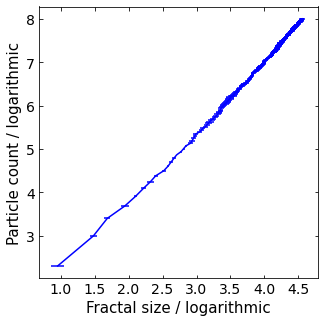

In [ ]:
#plotting

fig, ax = plt.subplots(figsize=(5,5))  

#graph formatting
ax.set_xlabel("Fractal size / logarithmic", fontsize=15)
ax.set_ylabel("Particle count / logarithmic", fontsize=15)
plt.xticks(fontsize=14)                 
plt.yticks(fontsize=14) 
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True) 
    
ax.errorbar(threeK_log_clusterSize, threeK_log_numParticles, yerr=None, xerr=threeK_errors, color='blue')

#ax.errorbar(oneK_log_raddii, oneK_log_numParticles, yerr=None, xerr=oneK_errors, color='red')

plt.show()

In [ ]:
#now want to calculate fractal dimension for different clusterSizes

